Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [2]:
NICKNAME = "nazar-si"

---

# Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. 

Получаемая таким образом квадратурная схема *точно* инегрирует $f(x)$ если это полином степени $m\le2n-1$, где $n$ - степень полинома, корни которого используются в качестве узлов.

## Двухточечная квадратура Гаусса

Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a, b]$. Заметим, что для этого достаточно построить _двухточечную_ квадратуру.

    hint:Легко найти точки и веса для отрезка [-1,1], после чего можно сделать аффинное преобразование..

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x) = 1$, т.е., интегралы вида

$$
\int_a^b\! f(x)\, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$

In [8]:
import numpy as np 
import scipy.optimize as opt 
import scipy.special as sp

def gauss_2(a, b):
   r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
   """
   n, w = sp.roots_legendre(2)
   s, r = (b + a) / 2, (b - a) / 2
   return s + r * n[0], s + r * n[1], r * w[0], r * w[1] 

In [10]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## Использование ортогональных полиномов

### Legendre

Теперь посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками".

In [11]:

I = lambda x : 7 / 4 * x ** 4 - 8 / 3 * x ** 3 - 3 * x ** 2 / 2 + 3 * x
res = I(1) - I(-1)
res

0.6666666666666674

2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в предыдущем дз). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

Ответ: Потребовалось 799996 узлов. Значение $\approx 1 /3$

In [13]:
# из прошлого дз
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки """
    def i(f, a, b, n):
        d = (b - a) / n
        return np.sum(np.array([d * f(a + (j + 0.5) * d) for j in range(n)]))

    n = int((b - a) / eps ** 0.5)
    i1 = i(func,a,b,n)
    while True: 
        i2 = i(func,a,b,2 * n)
        if abs(i2 - i1) < eps:
            return i2, n * 2 
        i1 = i2 
        n *= 2

f = lambda x: 7 * x ** 3 - 8 * x ** 2 - 3 * x + 3
value, N = midpoint_rule(f, -1, 1, eps=1e-10)
value, N

(0.6666666666749999, 799996)

3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), с помощью Гауссовой квадратуры (используя корни полинома Лежандра степени от 1 до 6 в качестве узлов) (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [29]:
for i in range(6):
    n, w = sp.roots_legendre(i + 1)

    print(f"Степень: {i + 1}, Ответ: {f(n) @ w}")

Степень: 1, Ответ: 6.0
Степень: 2, Ответ: 0.6666666666666674
Степень: 3, Ответ: 0.6666666666666632
Степень: 4, Ответ: 0.6666666666666667
Степень: 5, Ответ: 0.6666666666666681
Степень: 6, Ответ: 0.6666666666666695


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

In [28]:
I = lambda x : 7 / 4 * x ** 4 - 8 / 3 * x ** 3 - 3 * x ** 2 / 2 + 3 * x
ans = I(1) - I(-1)

for i in range(10):
    err = 10 ** (- i - 1)

    k = 0
    n = 0
    s = 0
    while abs(ans - s) > err:
        k += 1
        N, w = sp.roots_legendre(k)
        s = f(N) @ w
        n = len(N)
    
    value, N = midpoint_rule(f, -1, 1, eps=err)
    print(f"Ошибка: 1e-{i + 1}\t | Число узлов Гаусса: {n},\t  Число узлов старого метода: {N} ")

    

Ошибка: 1e-1	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 24 
Ошибка: 1e-2	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 40 
Ошибка: 1e-3	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 252 
Ошибка: 1e-4	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 800 
Ошибка: 1e-5	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 2528 
Ошибка: 1e-6	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 8000 
Ошибка: 1e-7	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 25296 
Ошибка: 1e-8	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 80000 
Ошибка: 1e-9	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 252980 
Ошибка: 1e-10	 | Число узлов Гаусса: 2,	  Число узлов старого метода: 799996 



Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [27]:
n, w = sp.roots_legendre(6)
x = 5 * n + 5 # (10 - 0) / 2 * n + (10 + 0) / 2
print(5 * f(x) @ w)

14713.333333333332


Сравните результат с точным значением интеграла.

Решение интеграла, полученное через Mathematica:
```ts
Integrate[7 x ^3 - 8 x^2 - 3 x + 3, {x, 0, 10}]
```
$$
\cfrac{44140}{3} \approx 14713.33
$$

Так что полученное значение хорошо совпадает с действительным.

### 

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит машинное $\epsilon$.


Приведем к отрезку $[-1, 1]$:
$$
z = \cfrac{x}{2\pi}
$$
$$
\int_0^1 \cfrac{\cos(2\pi z)\text{d} z}{\sqrt{1 - z^2}} = \cfrac{1}{2}\int_{-1}^1\cfrac{\cos(2\pi z)\text{d} z}{\sqrt{1 - z^2}}
$$

Ответ выражается через функцию Бесселя и равен численно $0.346010158812...$ (Mathematica)

In [31]:
f = lambda y: np.cos(2 * np.pi *  y) / 2
err = 1e-16
ans = 1
pans = 0
i = 0
while abs(ans - pans) > err:
    i += 1
    pans = ans
    n, w = sp.roots_chebyt(i)
    ans = f(n) @ w

print(ans)
print("Здесь сравнивается инкремент между разными аппроксимации, пока он не достигнет машинной точности")
print("Ответ совпадает с тем, что был выдан в Mathematica")

0.3460101588122642
Здесь сравнивается инкремент между разными аппроксимации, пока он не достигнет машинной точности
Ответ совпадает с тем, что был выдан в Mathematica


# Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Рассматривая данное уравнение на тех же узлах сетки $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.


Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \cos(x)  + \frac{1}{2\pi} \int_0^\pi \! \sin(x) \,t f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2\pi}$, ядро $K(x, t) = \sin(x)\cdot t$ и правая часть - $g(x) = \cos(x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006):

$$
f(x) = \cos(x)- \frac{2}{\pi}\sin(x)
$$

Для нахождения интеграла преобразуйте заменой переменных в интеграле область интегрирования в [0,1] воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Напишите функцию, возвращающую значение f(t_j) по схеме выше, которая в качестве параметра принимает величину $N$--число узлов в квадратуре, для нахождение решения СЛАУ можно использовать `scipy.linalg.solve`.

Постройте график истинного решения и набор (t_j, f_j) для раличных $N$, используя вашу функцию.

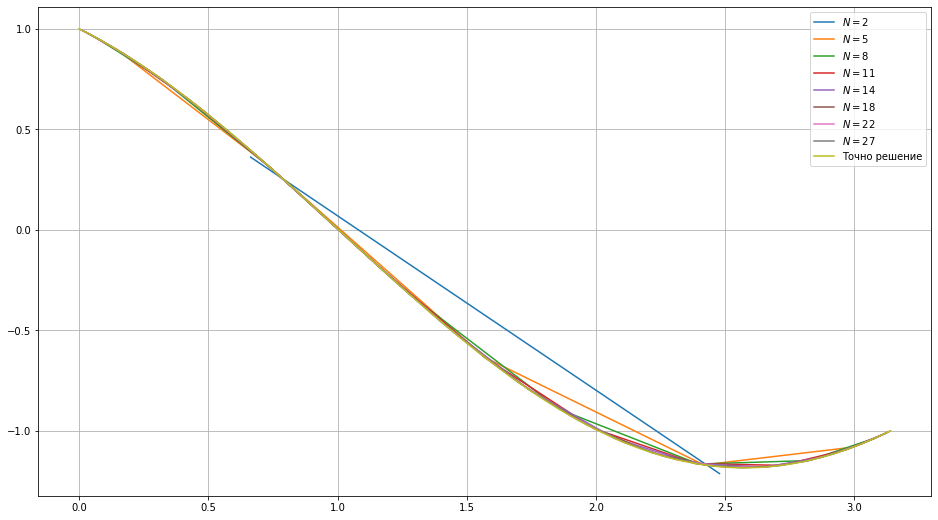

In [75]:
from scipy.linalg import solve
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (16, 9)

solution = lambda x: np.cos(x) - (2 / np.pi) * np.sin(x)

# Синусы, на которые раскладываемся K(x, t_j)
sin = lambda x, tj: np.sin(np.pi * x) * tj
# Аналогично, косинусы 
cos = lambda x: np.cos(np.pi * x)


def helper(N):
    n, w = sp.roots_sh_legendre(N)
    
    f = solve(
            np.pi / 2 * np.array([w * sin(tj, n) for tj in n]) - np.eye(N), 
            - cos(n)
        )

    return f


for N in range(2, 10):
    k = int(N ** 1.5)
    n, w = sp.roots_sh_legendre(k)

    x = n * np.pi
    f = helper(k)

    plt.plot(x, f, label=f'$N = {k}$')



plt.plot(np.linspace(0, 3.14, 150), solution(np.linspace(0, 3.14, 150)), label='Точно решение')
plt.legend()
plt.grid()
plt.show()

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их расположение.

Оказывается, интерполяционные методы (мы обсудим их на следующих занятиях) работают не очень хорошо, в сравнении с следующим подходом:

Используйте изначальный вид, чтобы вычислить значение функции на всём интервале:

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным решением для разлиных $N$.
(выбирайте наглядный масштаб)

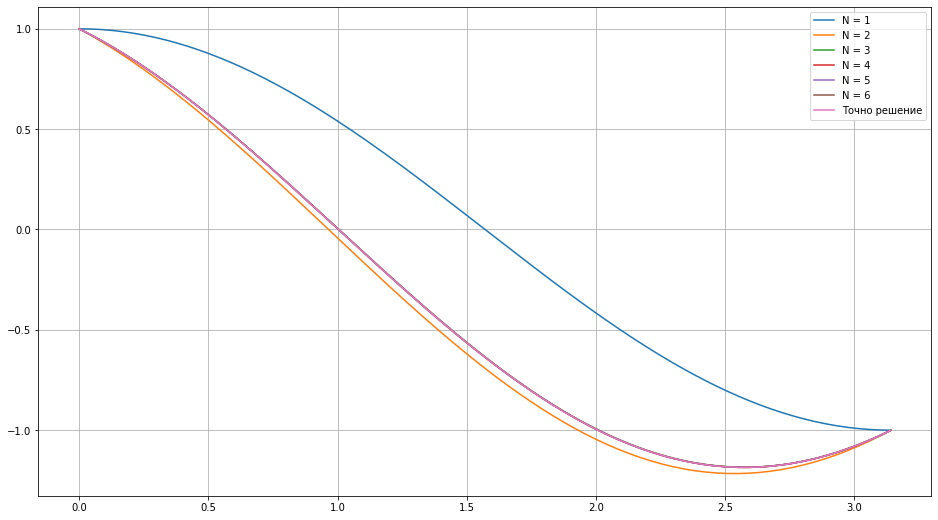

In [77]:
sample = np.linspace(0, 3.14, 150)

for i in range(0, 6):
    n, w = sp.roots_sh_legendre(i + 1)
    f_discret = helper(i + 1)
    f = lambda x: cos(x) + np.pi / 2 * (w * sin(x, n) * f_discret).sum()

    plt.plot(sample, [f(x / np.pi) for x in sample], label=f"N = {i + 1}")

plt.plot(sample, solution(sample), label='Точно решение')
plt.grid()
plt.legend()
plt.show()
    

# Часть 3. Интеграл от осциллирующей функции - EXTRA points task

Рассмотрим определенный интеграл

$$
I = \int_0^\infty\! \frac{\sin(x) \cos{(\cos{(x)})}}{x}\,dx
$$

Вычислите значение данного интеграла с относительной точностью $10^{-6}$. Для упрощения задачи можете воспользоваться функционалом `scipy.integrate.quad`.

Заметим, что "из коробки" интеграл вычислить не удается, и нужно что-то придумать.

In [ ]:
from math import sin, cos

from scipy.integrate import quad
quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))

Напишите функцию, которая возвращает значение данного интеграла. Только само значение интеграла, без оценки погрешности.
(оборачиваем интеграл в функцию только для удобства автопроверки).

In [ ]:
from scipy.integrate import quad

def integ():
    """Return a single float, the computed value of the integral."""
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
from numpy.testing import assert_allclose

# this is a test cell, keep it intact
